In [1]:
# instalacia kniznice pre pracu s krajinami - iso3, provincie a staty, kontinent
# !pip install --upgrade pip

In [2]:
# !pip install pycountry_convert

In [3]:
# !pip install xgboost

In [4]:
# !pip install --upgrade scikit-learn

In [5]:
# !pip install --upgrade scipy

In [24]:
# import zakladnych kniznic
import numpy as np
import pandas as pd

import operator
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import train_test_split 

import warnings
warnings.filterwarnings('ignore')

In [7]:
# nacitanie suborov
df_train = pd.read_csv("train.csv", parse_dates=['Date'])
df_test = pd.read_csv("test.csv", parse_dates=['Date'])

In [8]:
# vypis hlaviciek a opisov datasetu
df_train.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [9]:
df_train.describe()

,Id,ConfirmedCases,Fatalities
count,27231.000000,27231.000000,27231.000000
mean,17828.000000,1372.808050,75.991444
std,10300.673333,9488.242361,808.719059
min,1.000000,0.000000,0.000000
25%,8914.500000,0.000000,0.000000
50%,17828.000000,2.000000,0.000000
75%,26741.500000,138.000000,1.000000
max,35655.000000,230597.000000,22745.000000


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27231 entries, 0 to 27230
Data columns (total 6 columns):
Id                27231 non-null int64
Province_State    11571 non-null object
Country_Region    27231 non-null object
Date              27231 non-null datetime64[ns]
ConfirmedCases    27231 non-null float64
Fatalities        27231 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [11]:
df_test.head()

,ForecastId,Province_State,Country_Region,Date
0,1,NaN,Afghanistan,2020-04-02
1,2,NaN,Afghanistan,2020-04-03
2,3,NaN,Afghanistan,2020-04-04
3,4,NaN,Afghanistan,2020-04-05
4,5,NaN,Afghanistan,2020-04-06


In [12]:
df_train.describe()

,Id,ConfirmedCases,Fatalities
count,27231.000000,27231.000000,27231.000000
mean,17828.000000,1372.808050,75.991444
std,10300.673333,9488.242361,808.719059
min,1.000000,0.000000,0.000000
25%,8914.500000,0.000000,0.000000
50%,17828.000000,2.000000,0.000000
75%,26741.500000,138.000000,1.000000
max,35655.000000,230597.000000,22745.000000


In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27231 entries, 0 to 27230
Data columns (total 6 columns):
Id                27231 non-null int64
Province_State    11571 non-null object
Country_Region    27231 non-null object
Date              27231 non-null datetime64[ns]
ConfirmedCases    27231 non-null float64
Fatalities        27231 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [14]:
# teraz berieme policko Date ako String, preto ho preformatujem na Datetime format
df_train['Date'] = pd.to_datetime(df_train['Date'], format='%Y-%m-%d')
df_test['Date'] = pd.to_datetime(df_test['Date'], format='%Y-%m-%d')

# a teraz ho uz vieme citat ako datum

In [15]:
# vypis najstarsieho datumu a najnovsieho datumu z trenovacej mnoziny
train_date_min = df_train['Date'].min()
train_date_max = df_train['Date'].max()
print('Najstarší dátum z trénovacej množiny: {}'.format(train_date_min))
print('Najnovší dátum z trénovacej množiny: {}'.format(train_date_max))

Najstarší dátum z trénovacej množiny: 2020-01-22 00:00:00
Najnovší dátum z trénovacej množiny: 2020-04-17 00:00:00


In [16]:
# to iste pre testovaciu mnozinu
test_date_min = df_test['Date'].min()
test_date_max = df_test['Date'].max()
print('Najstarší dátum z testovacej množiny: {}'.format(test_date_min))
print('Najnovší dátum z testovacej množiny: {}'.format(test_date_max))

Najstarší dátum z testovacej množiny: 2020-04-02 00:00:00
Najnovší dátum z testovacej množiny: 2020-05-14 00:00:00


# Predikcia nových nakazení

In [17]:
df_train.head()
x_train = df_train[[]]

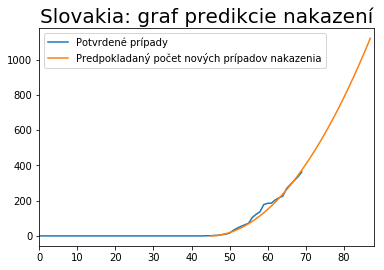

In [35]:
# Pre predikciu novych pripadov vyuzijem Linearnu regresiu
# Pridala som import sklearn
for country in df_train['Country_Region'].unique():
    # print('Robim model pre krajinu: {}'.format(country))
    df_train_country = df_train[df_train['Country_Region'] == country]
    df_test_country = df_test[df_test['Country_Region'] == country]
    
    # zaujima ma, ci ma krajina provinciu, ak ano -> vetva else
    if df_train_country['Province_State'].isnull().unique().any():
        # indexujem krajiny v csv subore - od a do
        x_train = np.array(range(len(df_train_country))).reshape((-1, 1))
        #print(x_train)
        y_train = df_train_country['ConfirmedCases']
        # print(y_train)
        
        # ucenie siete
        model = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=True)), ('linear', LinearRegression(fit_intercept=False))])
        
        Y = np.array([y_train])
        Yr = np.flip(Y, axis=1)
        Yr = Yr[0,::-1]
        Yrs = Yr.reshape(-1,1)
        x_train_scale = StandardScaler().fit_transform(x_train)
        y_train_scale = StandardScaler().fit_transform(Yrs)
        
        model.fit(x_train_scale, y_train_scale)
        
        # zacnem indexovat dni od 0
      
        x_test = np.array(range(len(df_test_country))).reshape((-1, 1))
        prediction = model.predict(x_test)
        
        # negativne pripady nahradim nulou
        prediction[prediction < 0] = 0
        
        # Vramci ConfirmedCases pridam sa novy stlpec v dataframe df_test kam vlozim predikciu k danej krajine
        df_test.loc[df_test['Country_Region'] == country, 'ConfirmedCases'] = prediction
       
        # print(df_test['ConfirmedCases'].astype('int'))
        
        if(country == "Slovakia"):
             # Visualising the Polynomial Regression results
             
            #print(x_train)
            # Y = np.array([y_train])
            # Yr = np.flip(Y, axis=1)
         
            plt.plot(x_train[:70,0], Yrs[:70,0])
            plt.xlim(0,10)
        
            #print(prediction)
            plt.plot(x_test+45, prediction)
            plt.xlim(0,88)
            plt.legend(['Potvrdené prípady', 'Predpokladaný počet nových prípadov nakazenia'])
            plt.title(country+': graf predikcie nakazení', size=20)
            
            plt.show()
        
    else:
        for state in df_train_country['Province_State'].unique():
            df_train_state = df_train_country[df_train_country['Province_State'] == state]
            df_test_state = df_test_country[df_test_country['Province_State'] == state]
            
            x_train = np.array(range(len(df_train_state))).reshape(-1, 1)
            y_train = df_train_state['ConfirmedCases']
            
            
            model = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=True)), ('linear', LinearRegression(fit_intercept=False))])
        
            Y = np.array([y_train])
            Yr = np.flip(Y, axis=1)
            Yr = Yr[0,::-1]
            Yrs = Yr.reshape(-1,1)
            x_train_scale = StandardScaler().fit_transform(x_train)
            y_train_scale = StandardScaler().fit_transform(Yrs)
        
            model.fit(x_train_scale, y_train_scale)
            
            x_test = np.array(range(len(df_test_state))).reshape((-1, 1))
            prediction = model.predict(x_test)
            
            prediction[prediction < 0] = 0
            
            # Vramci ConfirmedCases pridam sa novy stlpec v dataframe df_test kam vlozim predikciu k danej krajine
            df_test.loc[(df_test['Country_Region'] == country) & (df_test['Province_State'] == state), 'ConfirmedCases'] = prediction

## Vloženie naučených dát do *submission.csv*

In [19]:
# len vlozim data do pripraveneho csv suboru
df_submit = pd.read_csv('submission.csv')
df_submit['ConfirmedCases'] = df_test['ConfirmedCases'].astype('int')
df_submit.to_csv('submission.csv', index=False)

In [20]:
# df_test.head()

In [21]:
# df_train.info()